<a href="https://colab.research.google.com/github/herusy/Machine_Learning/blob/main/%D0%93%D0%B5%D1%80%D1%83%D1%81_%D0%BF%D1%80_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Герус Я.О. ФІТ 4-8



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
df = pd.read_html(url, header = 0)[2]

#1 Вивести перших 5 рядків
df.head(5)





,Country/Territory,IMF[1][13],IMF[1][13].1,World Bank[14],World Bank[14].1,United Nations[15],United Nations[15].1
0,Country/Territory,Forecast,Year,Estimate,Year,Estimate,Year
1,World,109529216,2024,105435540,2023,100834796,2022
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022


In [ ]:
#3 Визначити оптимальну кількість стовпців.
df.columns

Index(['Country/Territory', 'IMF[1][13]', 'IMF[1][13].1', 'World Bank[14]',
       'World Bank[14].1', 'United Nations[15]', 'United Nations[15].1'],
      dtype='object')

In [ ]:
#4 Змінити назви стовпців на більш зручні
# Поточні назви
current_colums = [
    ('Country/Territory'),
    ('IMF[1][13]'),
    ('IMF[1][13].1'),
    ('World Bank[14]'),
    ('World Bank[14].1'),
    ('United Nations[15]'),
    ('United Nations[15].1')
]

# Зручні назви
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UnitedNations_Estimate',
    'UnitedNations_Year'
]

df.columns = new_columns
df = df.drop(0)
df = df.drop(1)
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UnitedNations_Estimate,UnitedNations_Year
2,United States,28781083,2024,27360935,2023,25744100,2022
3,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
4,Germany,4591100,2024,4456081,2023,4076923,2022
5,Japan,4110452,2024,4212945,2023,4232173,2022
6,India,3937011,2024,3549919,2023,3465541,2022


In [ ]:
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UnitedNations_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]

df = df1.rename(columns=selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083,27360935,25744100
3,China,18532633,17794782,17963170
4,Germany,4591100,4456081,4076923
5,Japan,4110452,4212945,4232173
6,India,3937011,3549919,3465541


In [ ]:
#2 Визначити розмір датасета.
df.shape

(209, 4)

In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
#5 Визначити тип даних
print("\nТипи даних стовпців:\n", df.dtypes)


Типи даних стовпців:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [ ]:
#6 Замініть у таблиці значення "—" на значення NaN. Перевірити
#наявність пропущених значень. При наявності, замінити пропущені
#значення на середнє значення.
df.replace('—', float('nan'), inplace=True)

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

print("\nТипи даних після конвертації:\n", df.dtypes)
df.head(5)


Типи даних після конвертації:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083.0,27360935.0,25744100.0
3,China,18532633.0,17794782.0,17963170.0
4,Germany,4591100.0,4456081.0,4076923.0
5,Japan,4110452.0,4212945.0,4232173.0
6,India,3937011.0,3549919.0,3465541.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [ ]:
df = df.replace({'—': np.NaN})
df = df.fillna(df.mean(numeric_only=True), axis=0)

df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
2,United States,28781083.0,27360935.0,25744100.0
3,China,18532633.0,17794782.0,17963170.0
4,Germany,4591100.0,4456081.0,4076923.0
5,Japan,4110452.0,4212945.0,4232173.0
6,India,3937011.0,3549919.0,3465541.0


In [ ]:
#7 Ще раз перевірити наявність пропущених значень.
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
#8 Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = df[df.duplicated()]
print("\nНаявні дублікати:\n", duplicates)



Наявні дублікати:
 Empty DataFrame
Columns: [Country, MVF_2024, WorldBank_2023, OON_2022]
Index: []


In [ ]:
#9 Вивести описову статистику датасету describe()
description = df.describe()
print("\nСтатистика датасету:\n", description)


Статистика датасету:
            MVF_2024  WorldBank_2023      OON_2022
count  2.090000e+02    2.090000e+02  2.090000e+02
mean   5.644339e+05    5.178115e+05  4.811087e+05
std    2.435307e+06    2.325859e+06  2.236743e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.446700e+04    1.043800e+04  8.772000e+03
50%    5.631000e+04    4.320500e+04  3.171700e+04
75%    4.099890e+05    3.355330e+05  2.371010e+05
max    2.878108e+07    2.736094e+07  2.574410e+07


In [ ]:
#10. Визначте відхилення (різницю) між показниками MVF_2024 та
#WorldBank_2023 для кожної країни. У яких країнах ці показники
#найбільше відрізняються (дати відповідт)?

df['Difference'] = df['MVF_2024'] - df['WorldBank_2023']

print(df)

              Country    MVF_2024  WorldBank_2023    OON_2022  Difference
2       United States  28781083.0      27360935.0  25744100.0   1420148.0
3               China  18532633.0      17794782.0  17963170.0    737851.0
4             Germany   4591100.0       4456081.0   4076923.0    135019.0
5               Japan   4110452.0       4212945.0   4232173.0   -102493.0
6               India   3937011.0       3549919.0   3465541.0    387092.0
..                ...         ...             ...         ...         ...
206          Kiribati       311.0           279.0       223.0        32.0
207             Palau       308.0           263.0       225.0        45.0
208  Marshall Islands       305.0           284.0       279.0        21.0
209             Nauru       161.0           154.0       147.0         7.0
210            Tuvalu        66.0            62.0        59.0         4.0

[209 rows x 5 columns]


Найбільше відхилення спостерігається в США, де різниця становить 1,420,148 млн доларів, тоді як в Японії спостерігається від’ємне відхилення -102493 млн доларів між цими показниками.

In [ ]:
#11 Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022.
#Які пари змінних мають найвищу кореляцію?
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

print("\nКореляційна матриця:\n", correlation_matrix)

correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.stack().idxmax()
max_corr_value = correlation_matrix_no_diag.stack().max()

print(f'\nНайвища кореляція між: {max_corr[0]} і {max_corr[1]} = {max_corr_value}')


Кореляційна матриця:
                 MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.998216  0.997244
WorldBank_2023  0.998216        1.000000  0.998610
OON_2022        0.997244        0.998610  1.000000

Найвища кореляція між: WorldBank_2023 і OON_2022 = 0.9986099098264836


In [ ]:
#12. Обчисліть середнє значення для кожного стовпця (MVF_2024,
#WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
mean_mvf_2024 = df['MVF_2024'].mean()
mean_worldbank_2023 = df['WorldBank_2023'].mean()
mean_oon_2022 = df['OON_2022'].mean()

print(f'Середнє значення для MVF_2024: {mean_mvf_2024}')
print(f'Середнє значення для WorldBank_2023: {mean_worldbank_2023}')
print(f'Середнє значення для OON_2022: {mean_oon_2022}')


Середнє значення для MVF_2024: 564433.9329896907
Середнє значення для WorldBank_2023: 517811.472636816
Середнє значення для OON_2022: 481108.6730769231


Можна зробити висновок, що економіки країн у середньому продовжували зростати з року в рік.

In [ ]:
#13 Обчисліть стандартне відхилення показників для кожної країни. Яка
#країна має найвищу варіативність у показниках між роками?
df['std_dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

max_std_dev_country = df.loc[df['std_dev'].idxmax()]

print(f"Країна з найвищою варіативністю у показниках між роками: {max_std_dev_country['Country']}")
print(f"Стандартне відхилення: {max_std_dev_country['std_dev']}")

Країна з найвищою варіативністю у показниках між роками: United States
Стандартне відхилення: 1519552.648063348


In [ ]:
#14 Визначення країни з найвищим та найнижчим показниками: Знайдіть
#країну з найвищим та найнижчим показниками у кожному з років
#(MVF_2024, WorldBank_2023, OON_2022).

def find_extremes(column_name):
    max_value = df[column_name].max()
    min_value = df[column_name].min()
    max_country = df[df[column_name] == max_value]['Country'].values[0]
    min_country = df[df[column_name] == min_value]['Country'].values[0]
    return (max_country, max_value), (min_country, min_value)

max_mvf_2024, min_mvf_2024 = find_extremes('MVF_2024')
max_worldbank_2023, min_worldbank_2023 = find_extremes('WorldBank_2023')
max_oon_2022, min_oon_2022 = find_extremes('OON_2022')

print(f"Країна з найвищим показником MVF_2024: {max_mvf_2024[0]} ({max_mvf_2024[1]})")
print(f"Країна з найнижчим показником MVF_2024: {min_mvf_2024[0]} ({min_mvf_2024[1]})")

print(f"\nКраїна з найвищим показником WorldBank_2023: {max_worldbank_2023[0]} ({max_worldbank_2023[1]})")
print(f"Країна з найнижчим показником WorldBank_2023: {min_worldbank_2023[0]} ({min_worldbank_2023[1]})")

print(f"\nКраїна з найвищим показником OON_2022: {max_oon_2022[0]} ({max_oon_2022[1]})")
print(f"Країна з найнижчим показником OON_2022: {min_oon_2022[0]} ({min_oon_2022[1]})")

Країна з найвищим показником MVF_2024: United States (28781083.0)
Країна з найнижчим показником MVF_2024: Tuvalu (66.0)

Країна з найвищим показником WorldBank_2023: United States (27360935.0)
Країна з найнижчим показником WorldBank_2023: Tuvalu (62.0)

Країна з найвищим показником OON_2022: United States (25744100.0)
Країна з найнижчим показником OON_2022: Tuvalu (59.0)


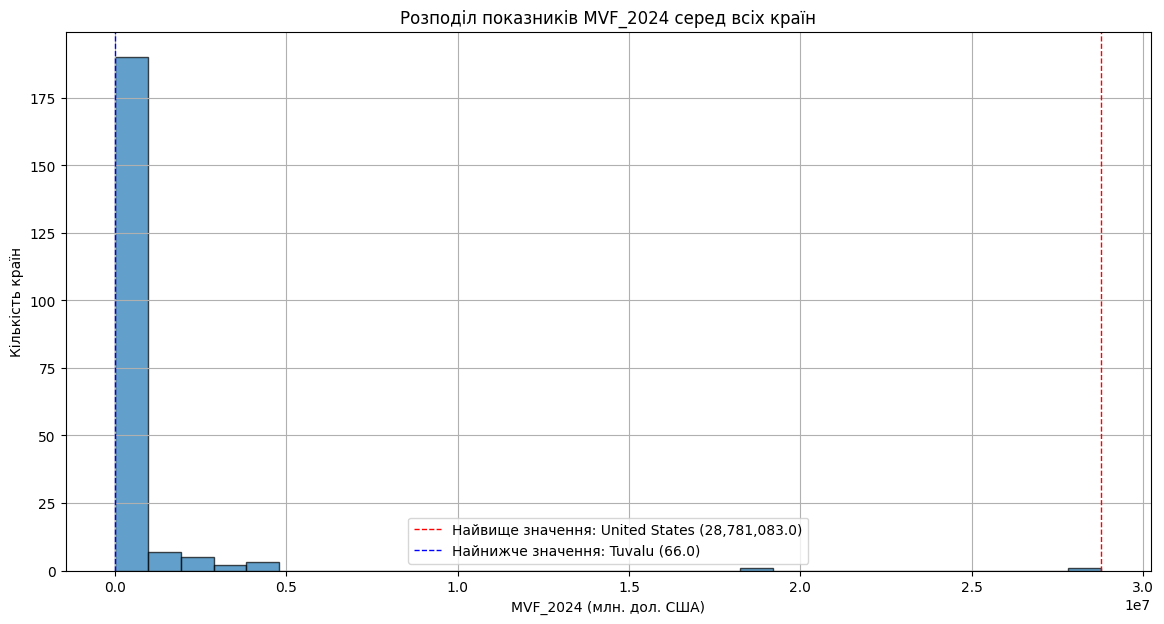

In [ ]:
#15 Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
#країн. Який вигляд має розподіл? Чи є країни, що виділяються?

import matplotlib.pyplot as plt

max_value = df['MVF_2024'].max()
min_value = df['MVF_2024'].min()

country_max = df[df['MVF_2024'] == max_value]['Country'].values[0]
country_min = df[df['MVF_2024'] == min_value]['Country'].values[0]

plt.figure(figsize=(14, 7))
plt.hist(df['MVF_2024'], bins=30, edgecolor='k', alpha=0.7)
plt.axvline(max_value, color='r', linestyle='dashed', linewidth=1, label=f'Найвище значення: {country_max} ({max_value:,})')
plt.axvline(min_value, color='b', linestyle='dashed', linewidth=1, label=f'Найнижче значення: {country_min} ({min_value:,})')
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('MVF_2024 (млн. дол. США)')
plt.ylabel('Кількість країн')
plt.legend()
plt.grid(True)
plt.show()


Гістограма показує спад від United States до Tuvalu. United States має найвищий ВВП серед усіх країн, а Tuvalu — найнижчий.

In [ ]:
#16 .Розрахуйте частку кожної країни в загальному значенні для кожного
#року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
#країн з часом (дати відповідь)?

total_mvf_2024 = df['MVF_2024'].sum()
total_worldbank_2023 = df['WorldBank_2023'].sum()
total_oon_2022 = df['OON_2022'].sum()

df['Share_MVF_2024'] = df['MVF_2024'] / total_mvf_2024
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / total_worldbank_2023
df['Share_OON_2022'] = df['OON_2022'] / total_oon_2022

print("\nЧастки для MVF_2024:")
print(df[['Country', 'Share_MVF_2024']].sort_values(by='Share_MVF_2024', ascending=False))

print("\nЧастки для WorldBank_2023:")
print(df[['Country', 'Share_WorldBank_2023']].sort_values(by='Share_WorldBank_2023', ascending=False))

print("\nЧастки для OON_2022:")
print(df[['Country', 'Share_OON_2022']].sort_values(by='Share_OON_2022', ascending=False))


Частки для MVF_2024:
              Country  Share_MVF_2024
2       United States    2.439764e-01
3               China    1.571006e-01
4             Germany    3.891861e-02
5               Japan    3.484417e-02
6               India    3.337392e-02
..                ...             ...
206          Kiribati    2.636337e-06
207             Palau    2.610906e-06
208  Marshall Islands    2.585476e-06
209             Nauru    1.364792e-06
210            Tuvalu    5.594800e-07

[209 rows x 2 columns]

Частки для WorldBank_2023:
              Country  Share_WorldBank_2023
2       United States          2.528209e-01
3               China          1.644276e-01
4             Germany          4.117514e-02
5               Japan          3.892851e-02
6               India          3.280201e-02
..                ...                   ...
208  Marshall Islands          2.624221e-06
206          Kiribati          2.578020e-06
207             Palau          2.430176e-06
209             Nauru         

Частки країн з часом мають тенденцію до зменшення. Частка США зменшується з року в рік, але залишаєтсья досить стабільною. Частка Tuvalu залишається надзвичайно малою і зменшується.

<ipython-input-23-f8763e4aae4e>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


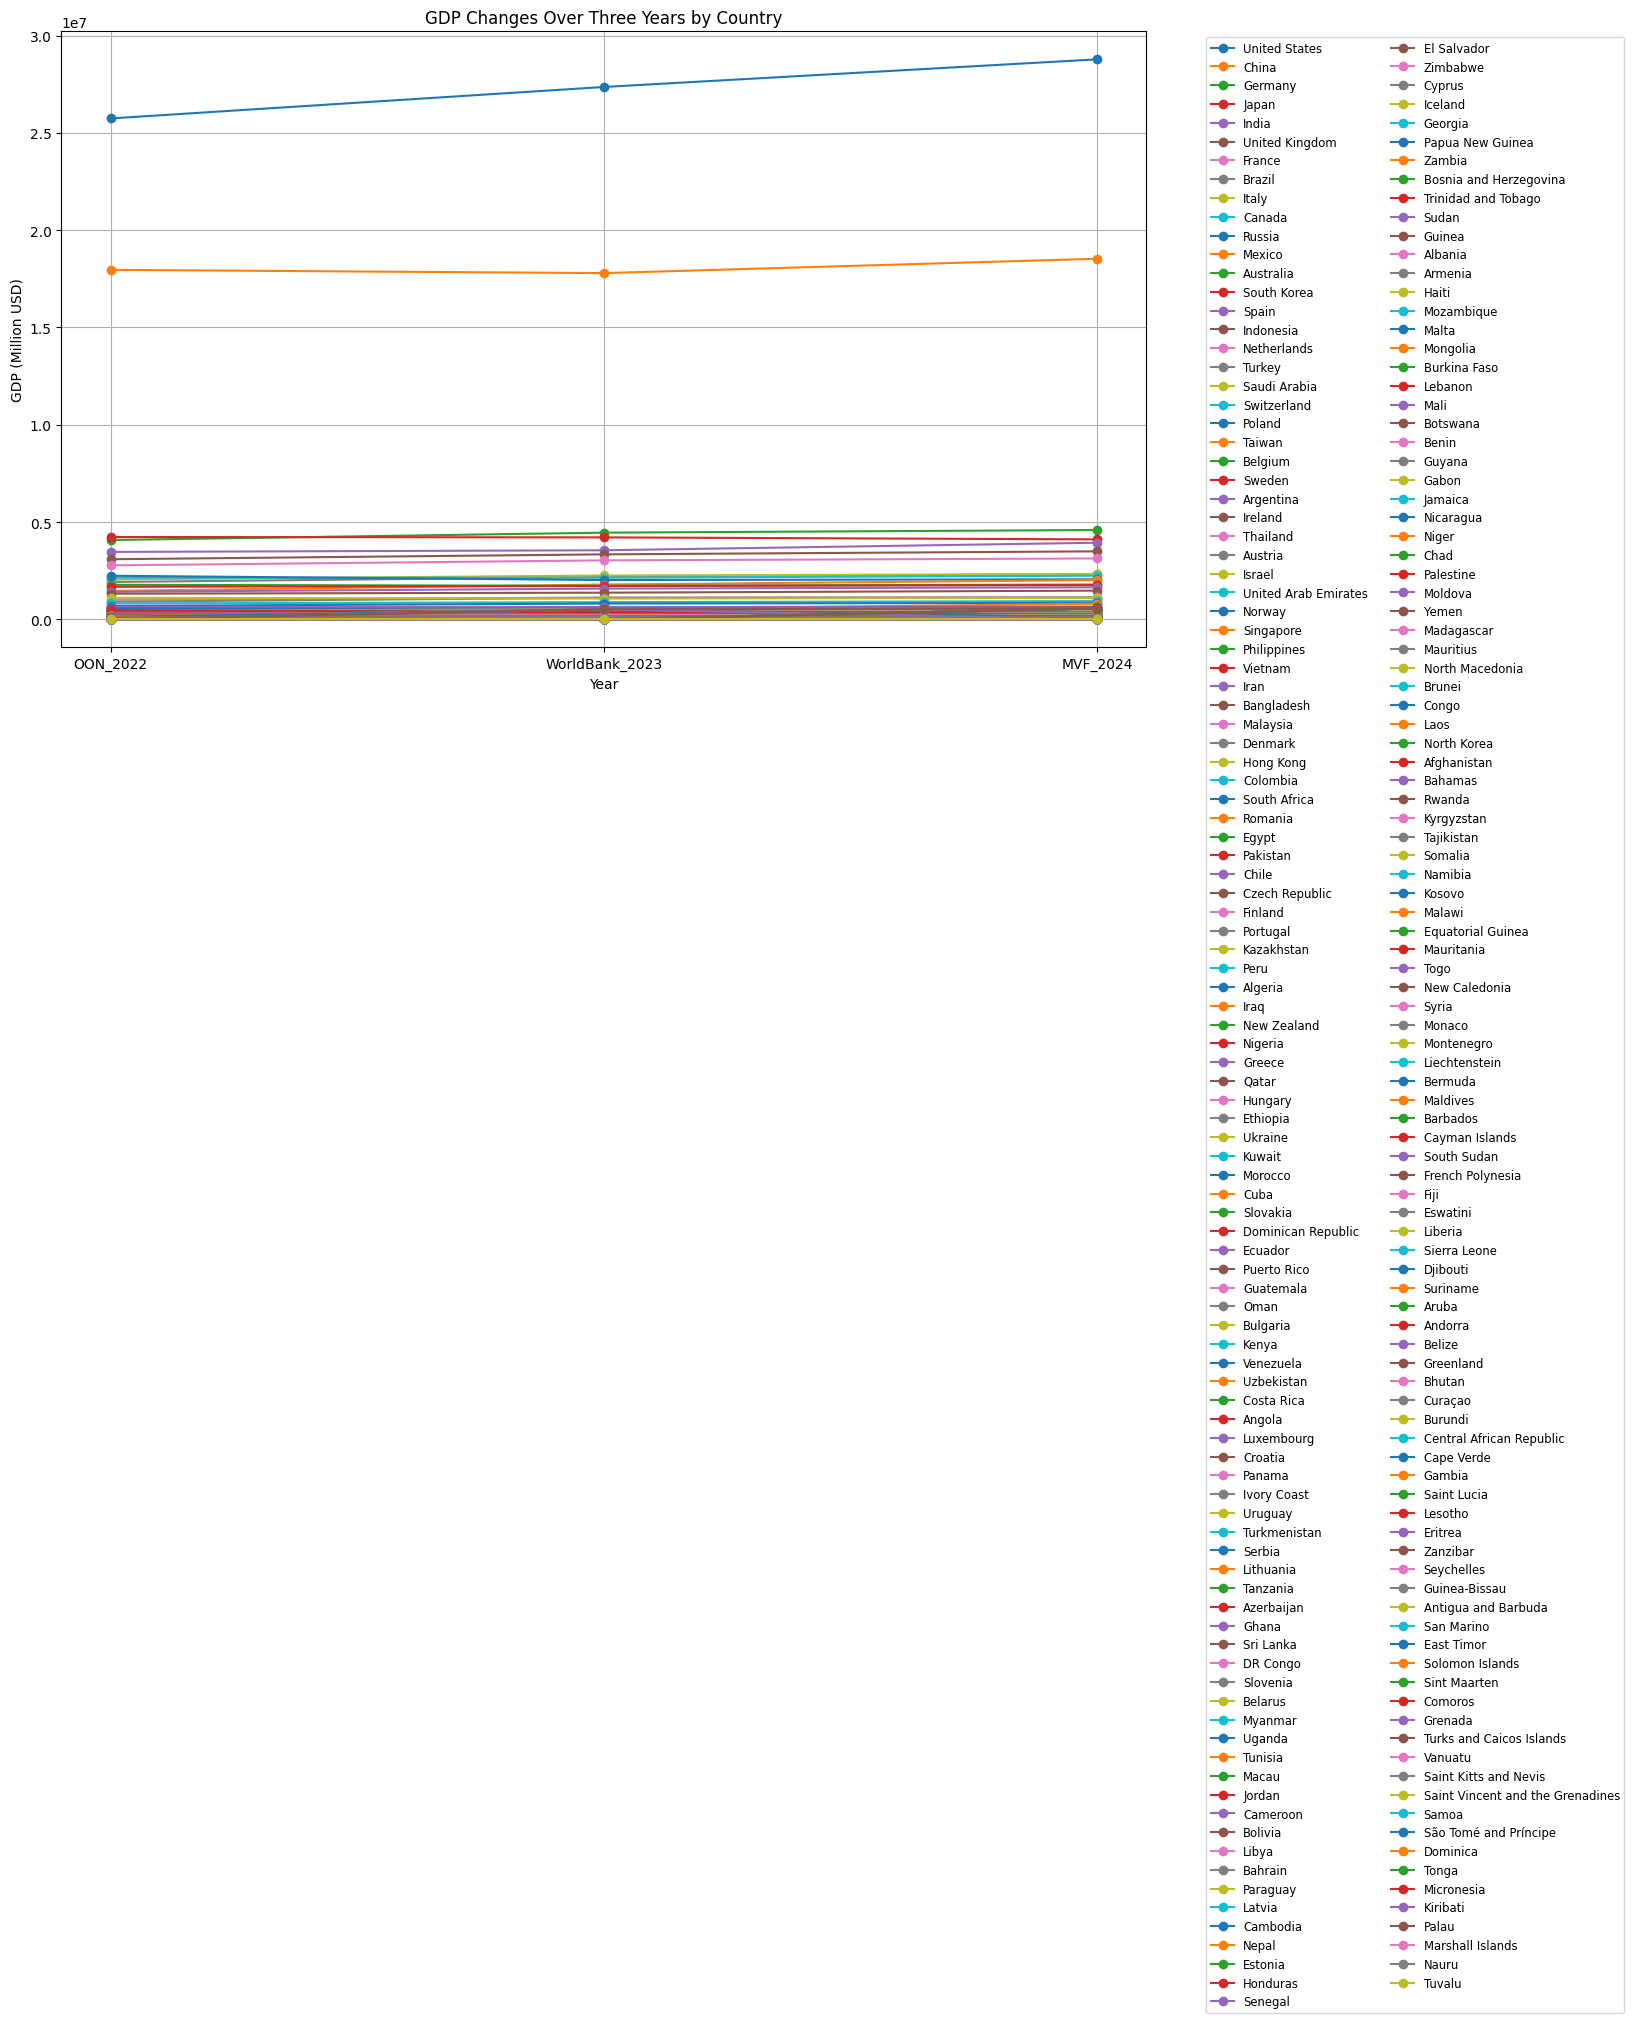

In [ ]:
#17 Візуалізуйте зміни в показниках для кожної країни за три роки на
#графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

plt.figure(figsize=(14, 8))

for index, row in df.iterrows():
    years = ['OON_2022', 'WorldBank_2023', 'MVF_2024']
    values = [row['OON_2022'], row['WorldBank_2023'], row['MVF_2024']]
    plt.plot(years, values, marker='o', label=row['Country'])

plt.xlabel('Year')
plt.ylabel('GDP (Million USD)')
plt.title('GDP Changes Over Three Years by Country')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

Стабільне зростання показують країни США та Китай, де спостерігається постійне збільшення ВВП протягом трьох років.
Незначне коливання або спад можна побачити в країнах Німеччина та Японія, де ВВП може коливатися з року в рік.

**Висновок:** Провівши аналіз економічних показників виявили, що найбільше відхилення між оцінками ВВП спостерігається в США, тоді як в Японії зафіксовано від'ємне відхилення. Загалом економіки країн продовжували зростати, з найбільшою варіативністю в показниках у США. США і Китай демонструють стабільне зростання ВВП, тоді як Німеччина та Японія показують коливання. Частки країн, зокрема США та Тувалу, мають тенденцію до зменшення.